In [31]:
from Precode import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


data = np.load('AllSamples.npy')

In [2]:
k1,i_point1,k2,i_point2 = initial_S1('8929') # please replace 0111 with your last four digit of your ID

Strategy 1: k and initial points


In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

3
[[2.48989693 8.40047863]
 [6.40483149 5.60578084]
 [7.77126987 8.91428052]]
5
[[3.12914724 3.40388727]
 [2.37650624 8.15241778]
 [3.32202131 6.15602339]
 [5.38398051 3.53840433]
 [6.40483149 5.60578084]]


300


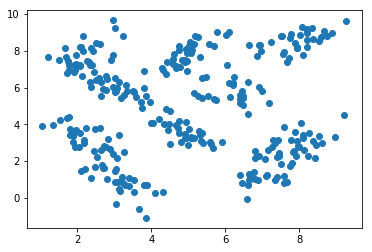

In [27]:
print(len(data))
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [57]:
import numpy as np
from scipy.spatial.distance import cdist

def kmeans_project1(x, k, num_of_iterations, i_points):
    # Randomly choosing centroids
    #idx = np.random.choice(len(x), k, replace=False)
    centroids = i_points
    
    # finding the distance between centroids and all the data points
    distances = cdist(x, centroids, 'euclidean')
    
    # centroid with the minimum distance
    points = np.array([np.argmin(i) for i in distances])
    
    # k-means objective function loss
    kmeans_losses = []
    
    # Repeating the above steps for a defined number of iterations
    for _ in range(num_of_iterations):
        centroids = []
        
        for idx in range(k):
            # update centroids by current cluster's mean
            tmp_centroid = x[points==idx].mean(axis=0)
            centroids.append(tmp_centroid)
        
        # update centroid
        centroids = np.vstack(centroids)
        
        distances = cdist(x, centroids, "euclidean")
        points = np.array([np.argmin(i) for i in distances])
    
        # calculate loss function
        tmp_sum = 0
        for i in range(k):
            tmp_data = np.sum((x[points==i]-centroids[i])**2)
            tmp_sum += tmp_data
        kmeans_losses.append(tmp_sum)
                
    return points, centroids, kmeans_losses 

In [62]:
def show_results(points, centroids, kmeans_losses, data):
    """
    show experiment results
    
    args:
        input:
            points : the class number assigned
            centroids : the coordinate of the centroids
            kmeans_losses : the list of the loss of each iteration's kmeans loss
        output:
            graphs
    """
    
    print(centroids)
    print(kmeans_losses[-1])
    
    df = pd.DataFrame(data)
    df["class"] = points
    
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))
    ax[0].plot(kmeans_losses)
    ax[0].set_title("losses")
    
    colors = ["red", "green", "blue", "yellow", "gray"]
    
    for i in range(len(centroids)):
        ax[1].scatter(df[df["class"]==i][0], df[df["class"]==i][1], color=colors[i], label=str(i))

In [58]:
points, centroids, kmeans_losses = kmeans_project1(data, k1, 100, i_point1)

[[2.56146449 6.08861338]
 [5.47740039 2.25498103]
 [6.49724962 7.52297293]]
1293.7774523911348


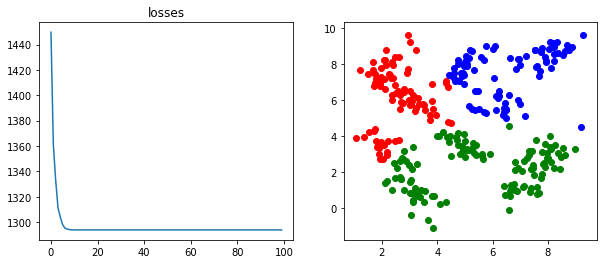

In [63]:
show_results(points, centroids, kmeans_losses, data)

In [64]:
points, centroids, kmeans_losses = kmeans_project1(data, k2, 100, i_point2)

[[3.21257461 2.49658087]
 [2.51976116 7.02028909]
 [5.29629878 6.64908797]
 [7.25262683 2.40015826]
 [7.75648325 8.55668928]]
613.9866286066629


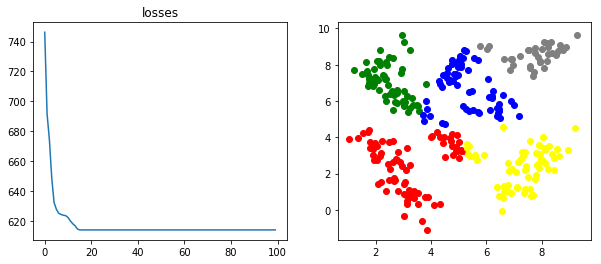

In [65]:
show_results(points, centroids, kmeans_losses, data)